# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Raffi Dzaky Mahendra
- **Email:** raffi.dzaky.mahendra@gmail.com
- **ID Dicoding:** Raffi Mahendra

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Kondisi Musim terhadap Jumlah Penyewaan Sepeda?
- Bagaimana Trend Penyewaan Sepeda Berdasarkan Jam?
- Bagaimana Perbandingan Penyewaan Sepeda Antara Pengguna Kasual dan Pengguna Terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Melakukan load dataset day.csv
- Melakukan load dataset hour.csv

### Assessing Data

#### day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tidak ditemukan adanya missing value pada day_df
- Ditemukan adanya data type yang kurang sesuai pada field 'dteday'

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada field 'weathersit' hanya memiliki minimum value bernilai 1 dan maximum value bernilai 3. Padahal jika merujuk ke dokumentasi Bike Sharing Dataset pada file Readme.txt seharusnya terdapat 4 kategori

In [6]:
day_df.duplicated().sum()

0

**Insight:**
- Tidak ditemukan adanya duplicate data pada day_df

#### hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tidak ditemukan adanya missing value pada hour_df
- Ditemukan adanya data type yang kurang sesuai pada field 'dteday'

In [8]:
hour_df.duplicated().sum()

0

**Insight:**
- Tidak ditemukan adanya duplicate data pada hour_df

### Cleaning Data

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- Mengubah tipe data kolom 'dteday' pada day_df menjadi datetime
- Mengubah tipe data kolom 'dteday' pada hour_df menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore Rata-Rata Jumlah Sepeda yang Disewa Berdasarkan Cuaca

In [10]:
weather_avg = hour_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)

In [11]:
weather_df = pd.DataFrame({
    'Cuaca': ['Cerah/sebagian berawan', 'Berkabut/Berawan', 'Hujan Ringan', 'Hujan Lebat'],
    'Rata-Rata Penyewaan': weather_avg.values
})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24808\98675187.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuaca', y='Rata-Rata Penyewaan', data=weather_df, palette=colors)


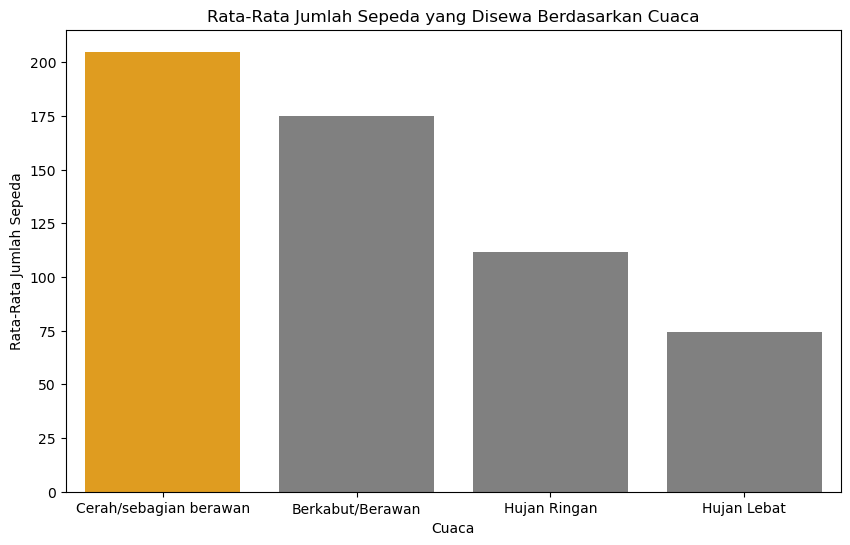

In [12]:
colors = ['gray' if (x != weather_avg.max()) else 'orange' for x in weather_avg]

plt.figure(figsize=(10, 6))
sns.barplot(x='Cuaca', y='Rata-Rata Penyewaan', data=weather_df, palette=colors)
plt.title('Rata-Rata Jumlah Sepeda yang Disewa Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-Rata Jumlah Sepeda')
plt.xticks(ticks=range(4), labels=['Cerah/sebagian berawan', 'Berkabut/Berawan', 'Hujan Ringan', 'Hujan Lebat'], rotation=0)
plt.show()

**Insight:**
- Rata - rata penyewaan sepeda tertinggi terjadi ketika cuaca sedang cerah / sebagian berawan 

### Explore Jumlah Total Sepeda yang Disewa Berdsarkan Hari dalam Seminggu

In [13]:
weekday_sum = day_df.groupby('weekday')['cnt'].sum()

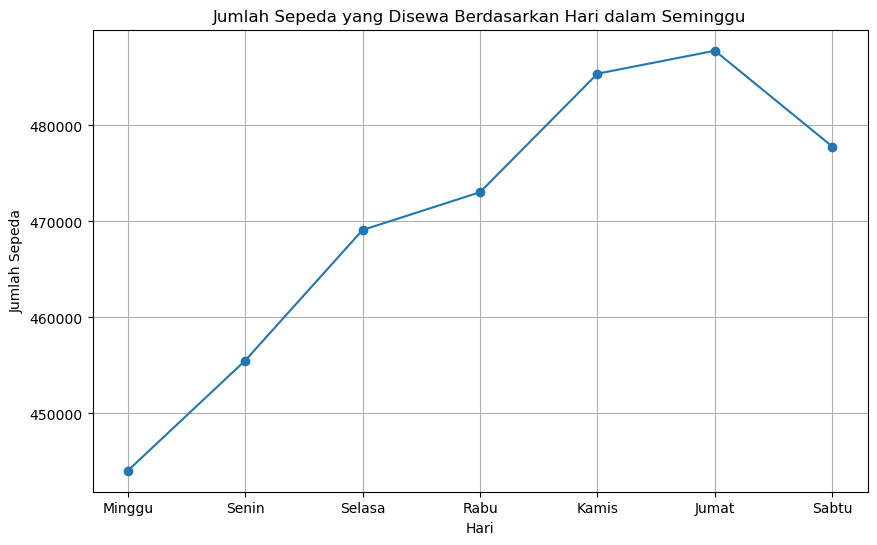

In [14]:
plt.figure(figsize=(10, 6))
weekday_sum.plot(kind='line', marker='o')
plt.title('Jumlah Sepeda yang Disewa Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Sepeda')
plt.xticks(ticks=range(7), labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.grid(True)
plt.show()


**Insight:**
- Jumlah penyewaan sepeda tertinggi terjadi pada Hari Kamis dan Jumat
- Jumlah penyewaan sepeda terendah terjadi pada Hari Minggu

## Visualization & Explanatory Analysis

### Bagaimana Pengaruh Kondisi Musim terhadap Jumlah Penyewaan Sepeda?

In [15]:
season_avg = day_df.groupby('season')['cnt'].mean().sort_values(ascending=False)

In [16]:
season_df = pd.DataFrame({
    'Musim': ['Gugur', 'Panas', 'Dingin', 'Semi'],
    'Rata-Rata Penyewaan': season_avg.values
})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24808\3319383163.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Musim', y='Rata-Rata Penyewaan', data=season_df, palette=colors)


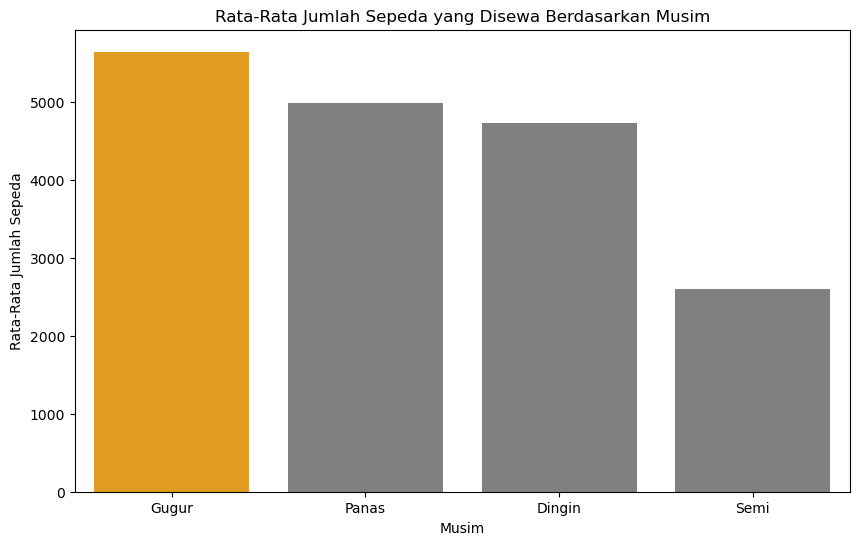

In [17]:
colors = ['gray' if (x != season_avg.max()) else 'orange' for x in season_avg]

plt.figure(figsize=(10, 6))
sns.barplot(x='Musim', y='Rata-Rata Penyewaan', data=season_df, palette=colors)
plt.title('Rata-Rata Jumlah Sepeda yang Disewa Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Jumlah Sepeda')
plt.xticks(ticks=range(4), labels=['Gugur', 'Panas', 'Dingin', 'Semi'], rotation=0)
plt.show()

**Insight:**
- Musim gugur dan panas memiliki rata - rata jumlah penyewa sepeda yang lebih tinggi jika dibandingkan dengan musim dingin dan semi 

### Bagaimana Trend Penyewaan Sepeda Berdasarkan Jam?

In [18]:
hourly_avg = hour_df.groupby('hr')['cnt'].mean()

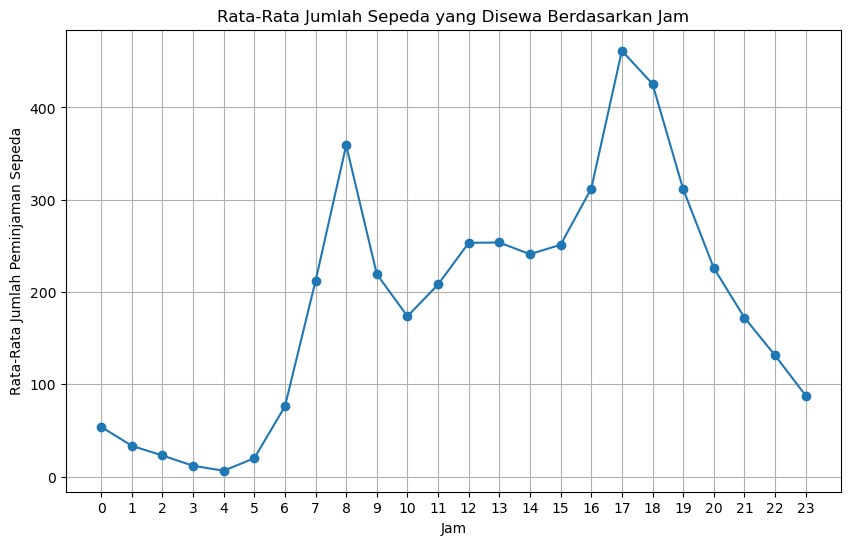

In [19]:
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='line', marker='o')
plt.title('Rata-Rata Jumlah Sepeda yang Disewa Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(24))
plt.grid(True)
plt.show()

**Insight:**
- Terdapat dua puncak peminjaman utama, yaitu pada sekitar jam 8 pagi dan 5 sore

### Bagaimana Perbandingan Penyewaan Sepeda Antara Pengguna Kasual dan Terdaftar?

In [20]:
user_type_avg = day_df[['casual', 'registered']].mean()

In [21]:
user_type_df = pd.DataFrame({
    'Tipe Pengguna': ['Kasual', 'Terdaftar'],
    'Rata-Rata Penyewaan': user_type_avg.values
})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24808\369375830.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipe Pengguna', y='Rata-Rata Penyewaan', data=user_type_df, palette=colors)


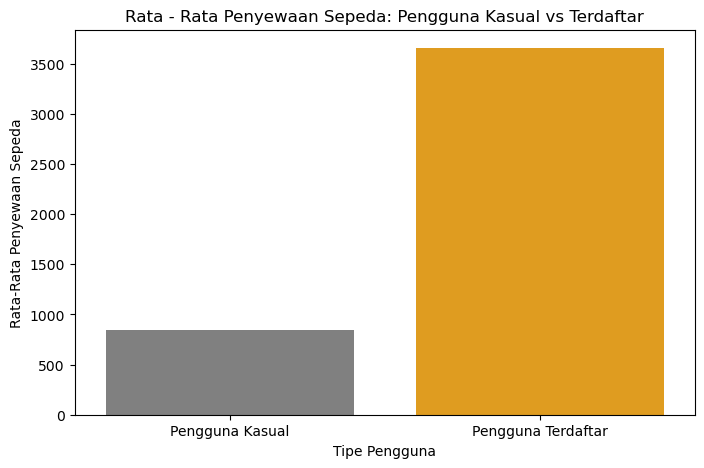

In [22]:
colors = ['gray' if (x != user_type_avg.max()) else 'orange' for x in user_type_avg]

plt.figure(figsize=(8,5))
sns.barplot(x='Tipe Pengguna', y='Rata-Rata Penyewaan', data=user_type_df, palette=colors)
plt.title('Rata - Rata Penyewaan Sepeda: Pengguna Kasual vs Terdaftar')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.xticks(ticks=range(2), labels=['Pengguna Kasual', 'Pengguna Terdaftar'], rotation=0)
plt.show()

**Insight:**
- Terdapat perbedaan yang sangat signifikan pada kedua kelompok tipe pengguna tersebut. Tipe pengguna 'Terdaftar' lebih aktif dalam menggunakan layanan sewa sepeda

## Conclusion

- **Bagaimana Pengaruh Kondisi Musim terhadap Jumlah Penyewaan Sepeda?**  
 Kondisi musim memiliki pengaruh yang cukup signifikan terhadap jumlah penyewaan sepeda, dimana berdasarkarkan data tabel jumlah rata-rata penyewaaan sepeda terbanyak terjadi di musim gugur sebesar 5.644 orang, kemudian selanjutnya di musim panas sejumlah 4.992 orang, musim dingin sebanyak 4.729 orang dan yang paling sediki di musi semi sebanyak 2.604 orang. Informasi data terkait jumlah penyewaan berdasarkan musim ini sangat berguna salah satunya adalah untuk menentukan sales program untuk meningkatkan jumlah penyewaan. Beberapa contoh sales program seperti halnya pemberlakukan potongan (discount) sewa selama musim semi atau musim dingin dapat dijadikan alternaif sebagai cara untuk meningkatkan jumlah penyewaan.

-  **Bagaimana Trend Penyewaan Sepeda Berdasarkan Jam?**  
Analisis trend penyewaan sepeda menunjukkan pola yang jelas, dengan puncak utama pada jam 8 pagi dan 5 sore. Pola tersebut mengindikasikan penggunaan yang erat terkait dengan jadwal kerja. Penyewaan terendah terjadi pada dini hari (jam 2 - 5 pagi), kemudian diikuti peningkatan tajam mulai jam 5 pagi. Untuk mengoptimalkan layanan bisnis, sebaiknya memaksimalkan ketersediaan sepeda pada jam - jam punak tersebut dan memanfaatkan periode yang tidak terlalu ramai untuk melakukan pemeliharaan fasilitas.

- **Bagaimana Perbandingan Penyewaan Sepeda Antara Pengguna Kasual dan Pengguna Terdaftar?**  
Berdasarkan hasil analisis perbandingan penyewaan sepeda antara pengguna kasual dan terdaftar, dapat disimpulkan bahwa terdapat perbedaan yang sangat signifikan antara kedua kelompok tersebut. Hal tersebut menunjukkan bahwa pengguna terdaftar merupakan segmen pelanggan yang lebih aktif dan royal dalam menggunakan layanan penyewaan sepeda. Untuk mengoptimalkan layanan bisnis ini, mungkin perlu ada strategi untuk mengkonversi pengguna kasual menjadi pengguna terdaftar, misalnya melalui program loyalitas atau insentif khusus.
